<!-- <img src="./logo_UTN.svg" align="right" width="150" />  -->
<img src="Logo_UNSAM.png" align="right" width="150" />  -->
#### Análisis y Procesamiento Digital de Señales

# Tarea Semanal N°04
#### Montserrat Coto



## Introducción

En esta tarea trabajaremos con la estimación de dos parámetros de una señal senoidal contaminada con ruido aditivo blanco gaussiano: su **amplitud** y su **frecuencia angular**. El objetivo principal es entender el concepto de **estimador** y analizar cómo varían sus resultados según el tipo de ventana utilizada en el análisis espectral.

La señal analizada tiene la forma:

$$x(n) = a_1 \cdot \sin(\Omega_1 \cdot n) + n_a(n)$$

donde:

$$\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}, \quad \Omega_0 = \frac{\pi}{2}, \quad f_r \sim \mathcal{U}\left(-\frac{1}{2}, \frac{1}{2}\right), \quad n_a(n) \sim \mathcal{N}(0, \sigma^2)$$

Es decir, la frecuencia de la senoidal varía levemente entre realizaciones, simulando una situación realista en la que la señal presenta incertidumbre en su frecuencia. El ruido agregado $n_a(n)$ es gaussiano y de media cero.

Para estimar los parámetros de la señal se definen los siguientes estimadores:

- Estimador de amplitud:

$$\hat{a}_1^{(i)} = \left| X_w^{(i)}(\Omega_0) \right|$$

- Estimador de frecuencia:

$$\hat{\Omega}_1^{(i)} = \arg \max_f \left\{ \left| X_w^{(i)}(\Omega) \right| \right\}$$

donde $X_w^{(i)}(\Omega)$ es la transformada de Fourier de la señal $x(n)$ luego de aplicarle la ventana $w_i(n)$, correspondiente al tipo de ventana $i$-ésimo.

Se consideran cuatro tipos de ventanas:

- Rectangular (sin ventana)
- Flattop
- Blackman-Harris
- Chebyshev (Chebwin)

Se generan **200 realizaciones** de la señal, con **1000 muestras** cada una, para poder analizar la distribución de los estimadores. Además, se experimenta con dos niveles de relación señal a ruido (SNR): **3 dB y 10 dB**. Para lograrlo, se calibra el valor de *a1* de forma que la señal tenga **potencia unitaria (1 W)**.

El objetivo de este estudio es analizar cómo influye el tipo de ventana en la precisión de los estimadores espectrales bajo distintas condiciones de ruido. Esto permite entender las ventajas y limitaciones de cada ventana en situaciones prácticas de procesamiento de señales.


# Desarollo

## A. Experimentación con *SNR=10*

### Espectros

##### Definición de Parámetros

In [53]:
# Importación de las ibrerías de jupyter

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
from scipy.fft import fft, fftshift


# Datos de la simulación

fs = 1000 # frecuencia de muestreo (Hz)
N = 1000 # cantidad de muestras
ts = 1/fs  # tiempo de muestreo
df =fs/N  # resolución espectral
R=200 # Numero de pruebas
SNR=10 #dB


In [54]:
#Generación de Señal

fr=np.random.uniform(-1/2,1/2,size=(1,R)) #Vector flat de [1, R]
tt = np.linspace(0, (N-1)*ts, N).reshape((N,1)) # Vector columna de [N, 1], el reshape me da formato vector de 1000 muestras por 1
vtt=np.tile(tt, (1,R)) #vector columna de [N, R]; repite R veces algo que es de [N;1]

f0=fs/4 #mitad de franja digital
f1=f0+fr*df

a1= np.sqrt(2)
xk = a1*np.sin(2*np.pi*f1*vtt) 

#Generación del ruido
Pnk=10**(-SNR/10) #Potencia del Ruido
sigma=np.sqrt(Pnk)
nk=np.random.normal(0,sigma,(N,R))

S=xk+nk #Señal senoidal con ruido

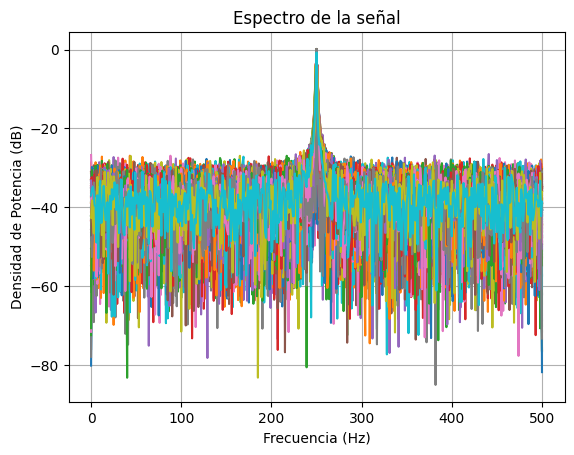

In [7]:
#Experimento: 

#FFT rectangular (sin ventana)
for i in range(R):
    plt.plot(tt,xk[:,i])

ft_S=np.fft.fft(S,axis=0)/N #FFT por columnas
ff=np.linspace(0,(N-1)*df,N) # # grilla de sampleo frecuencial

bfrec=ff<=fs/2

# cierro ventanas anteriores
plt.close('all')

plt.figure(1)
for i in range(R):
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec, i]) ** 2))

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
plt.title('Espectro de la señal')
plt.grid(True)
plt.show()

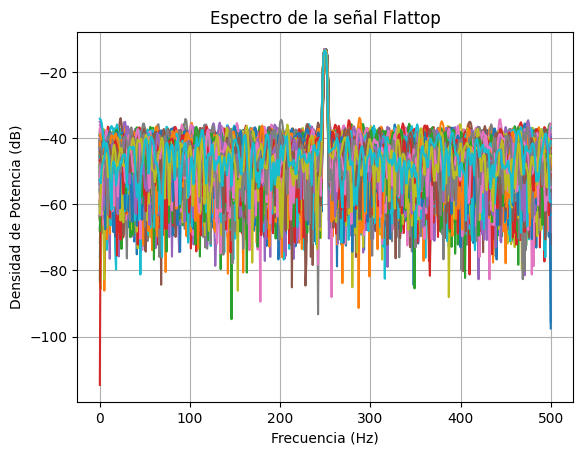

In [55]:
#Flattop
ventana=signal.windows.flattop(N).reshape((N,1))
SFlattop=S*ventana

ft_SFlattop=np.fft.fft(SFlattop,axis=0)/N #FFT por columnas
ff=np.linspace(0,(N-1)*df,N)

plt.figure(2)
for i in range(R):
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SFlattop[bfrec, i]) ** 2))



plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
plt.title('Espectro de la señal Flattop')
plt.grid(True)
plt.show()

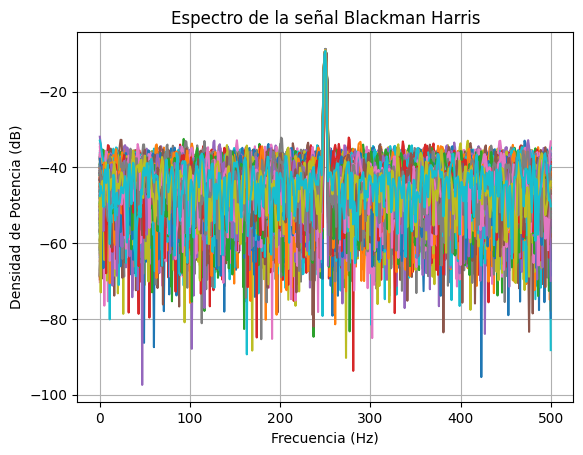

In [56]:
#Blackmanharris
ventana=signal.windows.blackmanharris(N).reshape((N,1))
SBlackmanharris=S*ventana

ft_SBlackmanharris=np.fft.fft(SBlackmanharris,axis=0)/N #FFT por columnas, el axis 0 me hace ir por columnas
ff=np.linspace(0,(N-1)*df,N)

plt.figure(3)
for i in range(R):
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SBlackmanharris[bfrec, i]) ** 2))


plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
plt.title('Espectro de la señal Blackman Harris')
plt.grid(True)
plt.show()

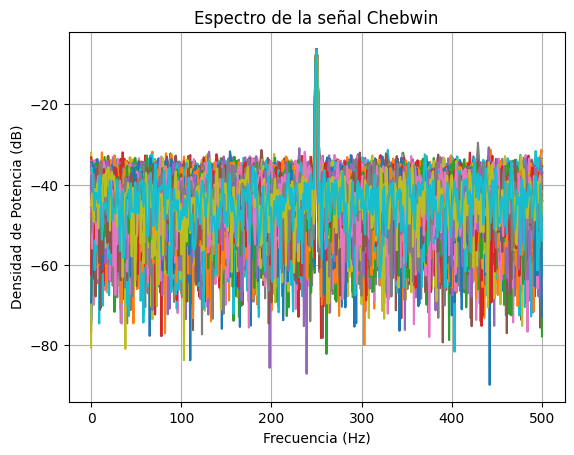

In [10]:
#Chebwin
ventana=signal.windows.chebwin(N,60).reshape((N,1)) #30 db atenuación en decibeles (dB) de las lóbulos laterales de la ventana Chebyshev.
SChebwin=S*ventana

ft_SChebwin=np.fft.fft(SChebwin,axis=0)/N #FFT por columnas, el axis 0 me hace ir por columnas
ff=np.linspace(0,(N-1)*df,N)

plt.figure(4)
for i in range(R):
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SChebwin[bfrec, i]) ** 2))


plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
plt.title('Espectro de la señal Chebwin')
plt.grid(True)
plt.show()

Comparación de los espectros de las distintas ventanas en una misma figura

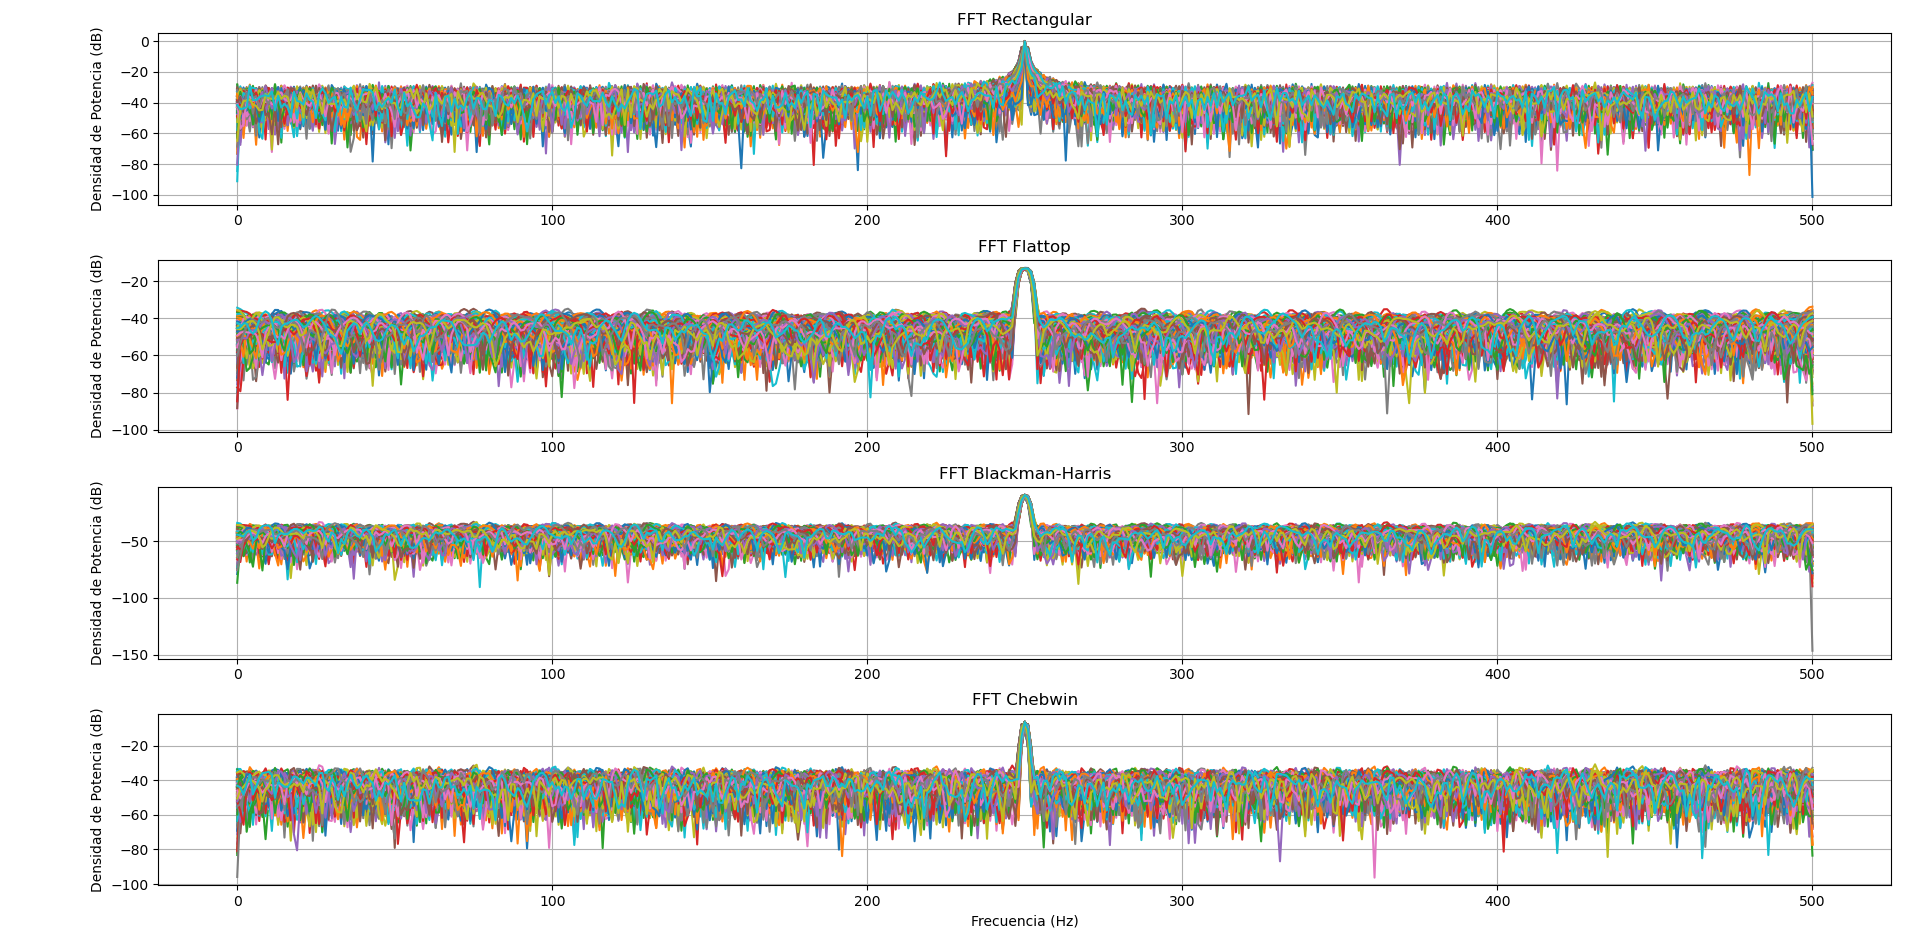

In [57]:
#Comparación de espectros con distintas ventanas en una misma figura
from IPython.display import Image
Image("Comparación de espectros SNR=10.PNG", width=1000, height=300)


## Estimador $a_1$ para las diferentes ventanas

In [58]:
#Estimador a1
a1S = np.abs(ft_S[250, :]) #fila de mi señal con fft rect
a1SFlattop = np.abs(ft_SFlattop[250, :]) #fila de mi señal con fft flat
a1SBlackmanharris = np.abs(ft_SBlackmanharris[250, :]) 
a1SChebwin = np.abs(ft_SChebwin[250, :]) 

### Histograma de los estimadores $a_1$

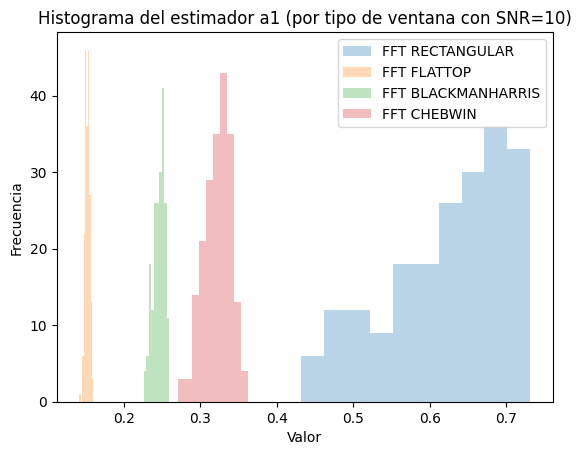

In [59]:
# Crear la figura
plt.figure(5)

# # Graficar cada vector por separado
plt.hist(a1S,bins=10,label='FFT RECTANGULAR',alpha=0.3)
plt.hist(a1SFlattop,bins=10,label='FFT FLATTOP',alpha=0.3)
plt.hist(a1SBlackmanharris,bins=10,label='FFT BLACKMANHARRIS',alpha=0.3)
plt.hist(a1SChebwin,bins=10,label='FFT CHEBWIN',alpha=0.3)
plt.title('Histograma del estimador a1 (por tipo de ventana con SNR=10)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Sesgos y varianza del estimador $a_1$ por ventana

In [60]:
#BOX
sesgo_a1_box=np.mean(a1S-a1) 
varianza_a1_box=np.var(a1S-a1) 
#Flattop
sesgo_a1_f=np.mean(a1SFlattop-a1)
varianza_a1_f=np.var(a1SFlattop-a1) 
#Blackharris
sesgo_a1_blackharris=np.mean(a1SBlackmanharris-a1) 
varianza_a1_blackharris=np.var(a1SBlackmanharris-a1)
#Chebwin
sesgo_a1_chebwin=np.mean(a1SChebwin-a1)
varianza_a1_chebwin=np.var(a1SChebwin-a1)

In [47]:
print(f"{'Ventana':<20}{'Sesgo':>30}{'Varianza':>30}")
print("-"*85)
print(f"{'Rectangular':<20}{sesgo_a1_box:>30.6e}{varianza_a1_box:>30.6e}")
print(f"{'Flattop':<20}{sesgo_a1_f:>30.6e}{varianza_a1_f:>30.6e}")
print(f"{'Blackman-Harris':<20}{sesgo_a1_blackharris:>30.6e}{varianza_a1_blackharris:>30.6e}")
print(f"{'Chebyshev':<20}{sesgo_a1_chebwin:>30.6e}{varianza_a1_chebwin:>30.6e}")



Ventana                                      Sesgo                      Varianza
-------------------------------------------------------------------------------------
Rectangular                          -7.920551e-01                  5.914195e-03
Flattop                              -1.261764e+00                  4.315545e-05
Blackman-Harris                      -1.167709e+00                  1.007030e-04
Chebyshev                            -1.091696e+00                  2.919605e-04


## Estimador $\omega_1$ para diferentes ventanas

In [61]:
##Estimador omega1 para ventana rectangular
# Usar solo la parte positiva del espectro
P_est1 = (1/N)*np.abs(ft_S[bfrec,:])**2  #bfrec frecuencias en Hz, hasta fs/2
omega1_est_box= np.argmax(P_est1, axis=0)*df  # índice del máximo por columna, y si lo múltiplico por df me da e Hertz

##Estimador omega1 para ventana Flattop
P_est2 = (1/N)*np.abs(ft_SFlattop[bfrec,:])**2  
omega1_est_f= np.argmax(P_est2, axis=0)*df  


##Estimador omega1 para ventana Blakmanharris
P_est3 = (1/N)*np.abs(ft_SBlackmanharris[bfrec,:])**2  
omega1_est_B= np.argmax(P_est3, axis=0)*df  

##Estimador omega1 para ventana Chebwin
P_est4 = (1/N)*np.abs(ft_SChebwin[bfrec,:])**2  
omega1_est_c= np.argmax(P_est4, axis=0)*df 


### Histograma de los estimadores $\omega_1$

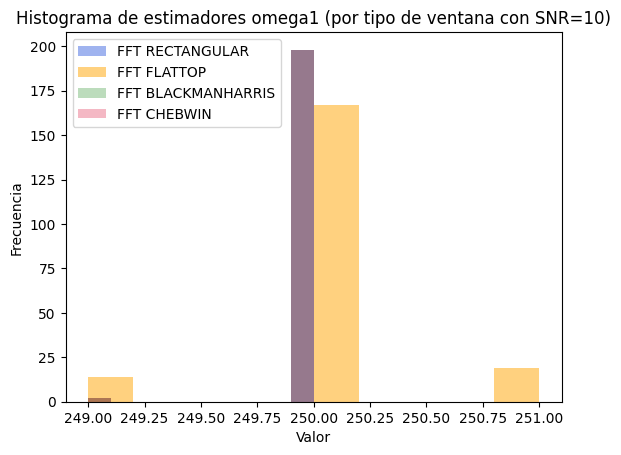

In [22]:
# Crear la figura
plt.figure(6)

## Graficar cada vector por separado
plt.hist(omega1_est_box, bins=10, label='FFT RECTANGULAR', alpha=0.5, color='royalblue')
plt.hist(omega1_est_f, bins=10, label='FFT FLATTOP', alpha=0.5, color='orange')
plt.hist(omega1_est_B, bins=10, label='FFT BLACKMANHARRIS', alpha=0.3, color='forestgreen')
plt.hist(omega1_est_c, bins=10, label='FFT CHEBWIN', alpha=0.3, color='crimson')

plt.title('Histograma de estimadores omega1 (por tipo de ventana con SNR=10)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Sesgos y varianza del estimador $\omega_1$ por ventana

In [62]:
#BOX
sesgo_omega1_box=np.mean(omega1_est_box-f1)
varianza_omega1_box=np.var(omega1_est_box-f1)
#FLATTOP
sesgo_omega1_f=np.mean(omega1_est_f-f1)
varianza_omega1_f=np.var(omega1_est_f-f1)
#BLACKHARRIS
sesgo_omega1_b=np.mean(omega1_est_B-f1)
varianza_omega1_b=np.var(omega1_est_B-f1)
#CHEBWIN
sesgo_omega1_c=np.mean(omega1_est_c-f1)
varianza_omega1_c=np.var(omega1_est_c-f1)

In [63]:
print(f"{'Ventana':<20}{'Sesgo ω₁':>30}{'Varianza ω₁':>30}")
print("-" * 85)
print(f"{'Rectangular':<20}{sesgo_omega1_box:>30.6e}{varianza_omega1_box:>30.6e}")
print(f"{'Flattop':<20}{sesgo_omega1_f:>30.6e}{varianza_omega1_f:>30.6e}")
print(f"{'Blackman-Harris':<20}{sesgo_omega1_b:>30.6e}{varianza_omega1_b:>30.6e}")
print(f"{'Chebyshev':<20}{sesgo_omega1_c:>30.6e}{varianza_omega1_c:>30.6e}")



Ventana                                   Sesgo ω₁                   Varianza ω₁
-------------------------------------------------------------------------------------
Rectangular                          -3.997285e-02                  9.632262e-02
Flattop                              -4.972847e-03                  1.109356e-01
Blackman-Harris                      -2.997285e-02                  8.003700e-02
Chebyshev                            -2.997285e-02                  1.144913e-01


## A. Experimentación con *SNR=3*

### Espetros

In [64]:
SNR=3 #dB

#Generación del ruido
Pnk=10**(-SNR/10) #Potencia del Ruido
sigma=np.sqrt(Pnk)
nk=np.random.normal(0,sigma,(N,R))

S=xk+nk

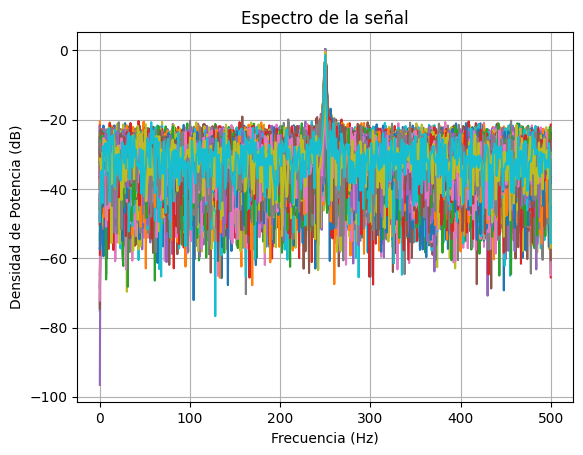

In [65]:
#Experimento: 

#FFT rectangular (sin ventana)
for i in range(R):
    plt.plot(tt,xk[:,i])

ft_S=np.fft.fft(S,axis=0)/N #FFT por columnas
ff=np.linspace(0,(N-1)*df,N) # # grilla de sampleo frecuencial

bfrec=ff<=fs/2

# cierro ventanas anteriores
plt.close('all')

plt.figure(1)
for i in range(R):
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec, i]) ** 2))

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
plt.title('Espectro de la señal')
plt.grid(True)
plt.show()

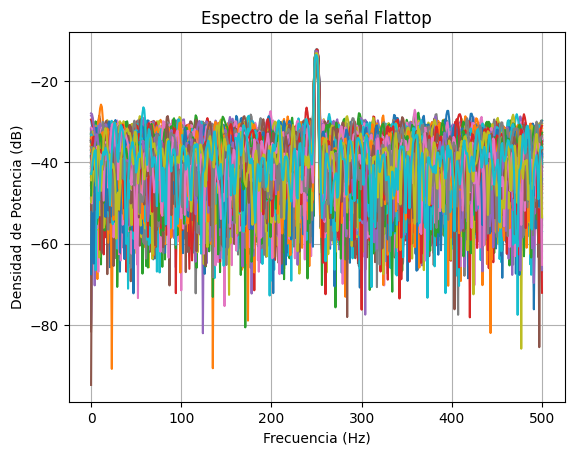

In [66]:
#Flattop
ventana=signal.windows.flattop(N).reshape((N,1))
SFlattop=S*ventana

ft_SFlattop=np.fft.fft(SFlattop,axis=0)/N #FFT por columnas
ff=np.linspace(0,(N-1)*df,N)

plt.figure(2)
for i in range(R):
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SFlattop[bfrec, i]) ** 2))



plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
plt.title('Espectro de la señal Flattop')
plt.grid(True)
plt.show()

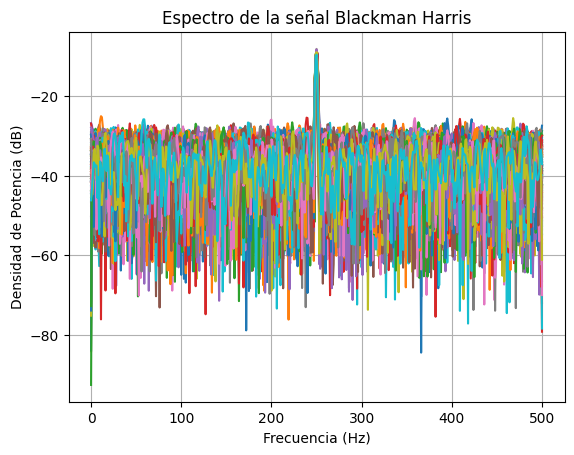

In [67]:
#Blackmanharris
ventana=signal.windows.blackmanharris(N).reshape((N,1))
SBlackmanharris=S*ventana

ft_SBlackmanharris=np.fft.fft(SBlackmanharris,axis=0)/N #FFT por columnas, el axis 0 me hace ir por columnas
ff=np.linspace(0,(N-1)*df,N)

plt.figure(3)
for i in range(R):
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SBlackmanharris[bfrec, i]) ** 2))


plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
plt.title('Espectro de la señal Blackman Harris')
plt.grid(True)
plt.show()

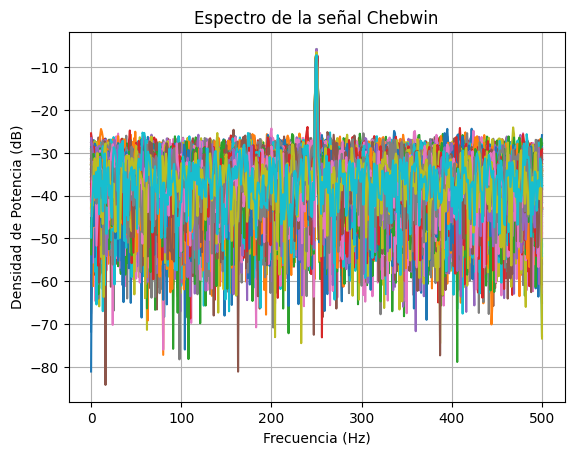

In [68]:
#Chebwin
ventana=signal.windows.chebwin(N,60).reshape((N,1)) #30 db atenuación en decibeles (dB) de las lóbulos laterales de la ventana Chebyshev.
SChebwin=S*ventana

ft_SChebwin=np.fft.fft(SChebwin,axis=0)/N #FFT por columnas, el axis 0 me hace ir por columnas
ff=np.linspace(0,(N-1)*df,N)

plt.figure(4)
for i in range(R):
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SChebwin[bfrec, i]) ** 2))


plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (dB)')
plt.title('Espectro de la señal Chebwin')
plt.grid(True)
plt.show()

Comparación de los espectros de las distintas ventanas en una misma figura

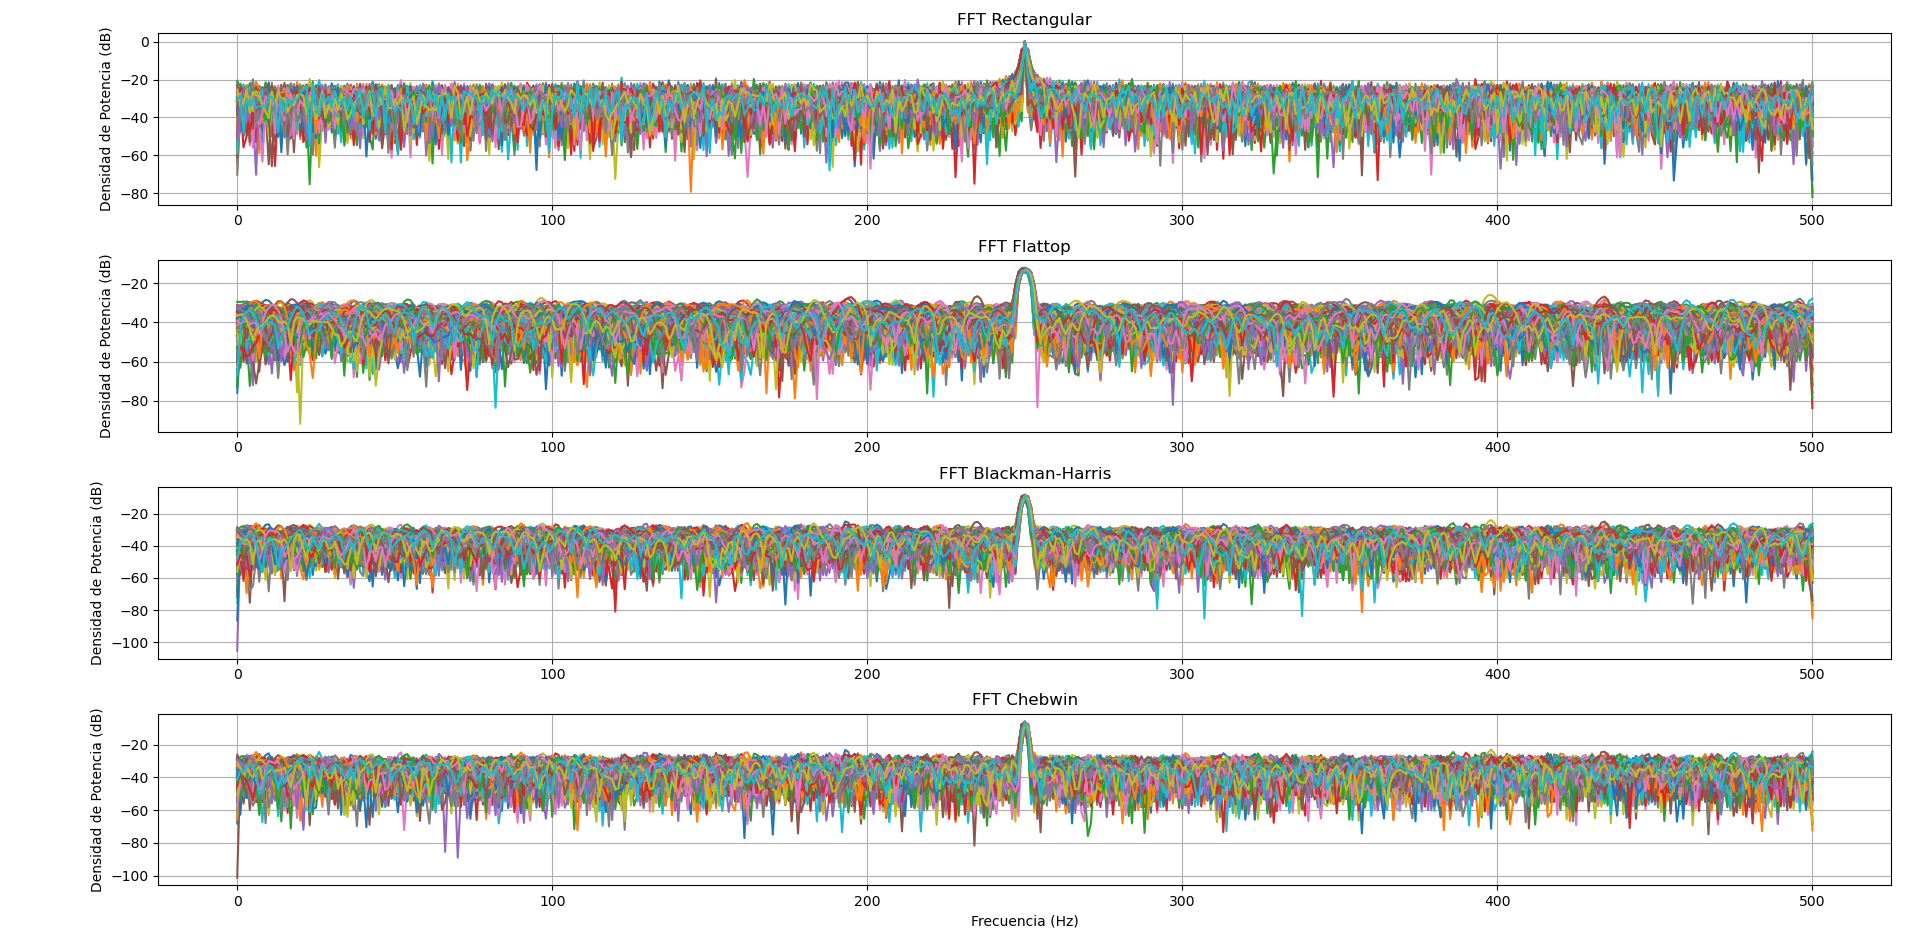

In [69]:
#Comparación de espectros con distintas ventanas en una misma figura
from IPython.display import Image
Image("Comparación de espectros SNR=3.PNG", width=1000, height=300)

## Estimador $a_1$ para las diferentes ventanas

In [70]:
#Estimador a1
a1S = np.abs(ft_S[250, :]) #fila de mi señal con fft rect
a1SFlattop = np.abs(ft_SFlattop[250, :]) #fila de mi señal con fft flat
a1SBlackmanharris = np.abs(ft_SBlackmanharris[250, :]) 
a1SChebwin = np.abs(ft_SChebwin[250, :]) 

### Histograma de los estimadores $a_1$

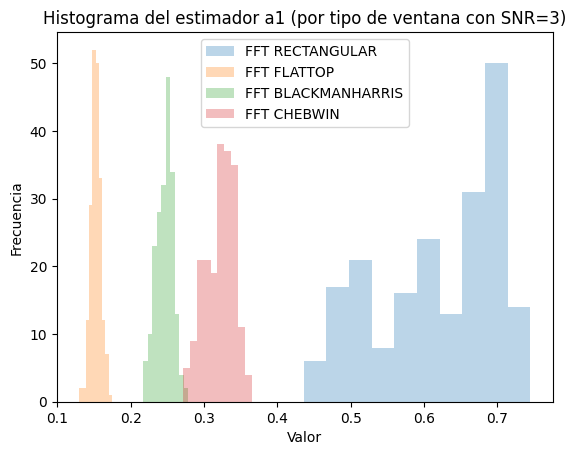

In [71]:
# Crear la figura
plt.figure(5)

# # Graficar cada vector por separado
plt.hist(a1S,bins=10,label='FFT RECTANGULAR',alpha=0.3)
plt.hist(a1SFlattop,bins=10,label='FFT FLATTOP',alpha=0.3)
plt.hist(a1SBlackmanharris,bins=10,label='FFT BLACKMANHARRIS',alpha=0.3)
plt.hist(a1SChebwin,bins=10,label='FFT CHEBWIN',alpha=0.3)
plt.title('Histograma del estimador a1 (por tipo de ventana con SNR=3)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Sesgos y varianza del estimador $a_1$ por ventana

In [72]:
#BOX
sesgo_a1_box=np.mean(a1S-a1) 
varianza_a1_box=np.var(a1S-a1) 
#Flattop
sesgo_a1_f=np.mean(a1SFlattop-a1)
varianza_a1_f=np.var(a1SFlattop-a1) 
#Blackharris
sesgo_a1_blackharris=np.mean(a1SBlackmanharris-a1) 
varianza_a1_blackharris=np.var(a1SBlackmanharris-a1)
#Chebwin
sesgo_a1_chebwin=np.mean(a1SChebwin-a1)
varianza_a1_chebwin=np.var(a1SChebwin-a1)

In [74]:
print(f"{'Ventana':<20}{'Sesgo':>30}{'Varianza':>30}")
print("-"*85)
print(f"{'Rectangular':<20}{sesgo_a1_box:>30.6e}{varianza_a1_box:>30.6e}")
print(f"{'Flattop':<20}{sesgo_a1_f:>30.6e}{varianza_a1_f:>30.6e}")
print(f"{'Blackman-Harris':<20}{sesgo_a1_blackharris:>30.6e}{varianza_a1_blackharris:>30.6e}")
print(f"{'Chebyshev':<20}{sesgo_a1_chebwin:>30.6e}{varianza_a1_chebwin:>30.6e}")


Ventana                                      Sesgo                      Varianza
-------------------------------------------------------------------------------------
Rectangular                          -7.946874e-01                  6.737247e-03
Flattop                              -1.261640e+00                  4.754382e-05
Blackman-Harris                      -1.168073e+00                  1.368899e-04
Chebyshev                            -1.092498e+00                  3.840451e-04


## Estimador $\omega_1$ para diferentes ventanas

In [75]:
##Estimador omega1 para ventana rectangular
# Usar solo la parte positiva del espectro
P_est1 = (1/N)*np.abs(ft_S[bfrec,:])**2  #bfrec frecuencias en Hz, hasta fs/2
omega1_est_box= np.argmax(P_est1, axis=0)*df  # índice del máximo por columna, y si lo múltiplico por df me da e Hertz

##Estimador omega1 para ventana Flattop
P_est2 = (1/N)*np.abs(ft_SFlattop[bfrec,:])**2  
omega1_est_f= np.argmax(P_est2, axis=0)*df  


##Estimador omega1 para ventana Blakmanharris
P_est3 = (1/N)*np.abs(ft_SBlackmanharris[bfrec,:])**2  
omega1_est_B= np.argmax(P_est3, axis=0)*df  

##Estimador omega1 para ventana Chebwin
P_est4 = (1/N)*np.abs(ft_SChebwin[bfrec,:])**2  
omega1_est_c= np.argmax(P_est4, axis=0)*df 


### Histograma de los estimadores $\omega_1$

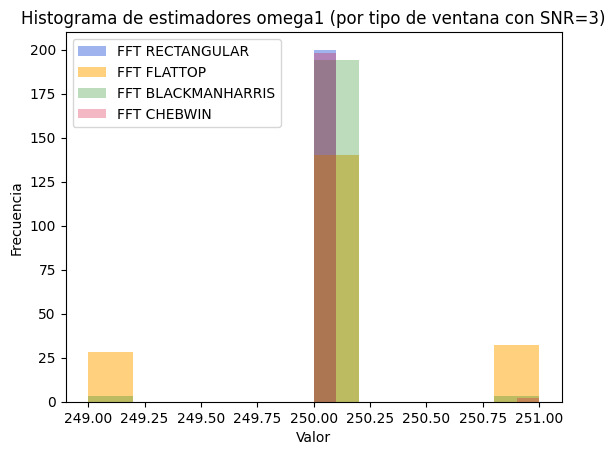

In [76]:
# Crear la figura
plt.figure(6)

## Graficar cada vector por separado
plt.hist(omega1_est_box, bins=10, label='FFT RECTANGULAR', alpha=0.5, color='royalblue')
plt.hist(omega1_est_f, bins=10, label='FFT FLATTOP', alpha=0.5, color='orange')
plt.hist(omega1_est_B, bins=10, label='FFT BLACKMANHARRIS', alpha=0.3, color='forestgreen')
plt.hist(omega1_est_c, bins=10, label='FFT CHEBWIN', alpha=0.3, color='crimson')

plt.title('Histograma de estimadores omega1 (por tipo de ventana con SNR=3)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Sesgos y varianza del estimador $\omega_1$ por ventana

In [77]:
#BOX
sesgo_omega1_box=np.mean(omega1_est_box-f1)
varianza_omega1_box=np.var(omega1_est_box-f1)
#FLATTOP
sesgo_omega1_f=np.mean(omega1_est_f-f1)
varianza_omega1_f=np.var(omega1_est_f-f1)
#BLACKHARRIS
sesgo_omega1_b=np.mean(omega1_est_B-f1)
varianza_omega1_b=np.var(omega1_est_B-f1)
#CHEBWIN
sesgo_omega1_c=np.mean(omega1_est_c-f1)
varianza_omega1_c=np.var(omega1_est_c-f1)

In [78]:
print(f"{'Ventana':<20}{'Sesgo ω₁':>30}{'Varianza ω₁':>30}")
print("-" * 85)
print(f"{'Rectangular':<20}{sesgo_omega1_box:>30.6e}{varianza_omega1_box:>30.6e}")
print(f"{'Flattop':<20}{sesgo_omega1_f:>30.6e}{varianza_omega1_f:>30.6e}")
print(f"{'Blackman-Harris':<20}{sesgo_omega1_b:>30.6e}{varianza_omega1_b:>30.6e}")
print(f"{'Chebyshev':<20}{sesgo_omega1_c:>30.6e}{varianza_omega1_c:>30.6e}")


Ventana                                   Sesgo ω₁                   Varianza ω₁
-------------------------------------------------------------------------------------
Rectangular                          -3.497285e-02                  7.966155e-02
Flattop                              -1.497285e-02                  1.930788e-01
Blackman-Harris                      -3.497285e-02                  8.089777e-02
Chebyshev                            -2.497285e-02                  8.062955e-02


## BONUS - *ZERO PADDING*

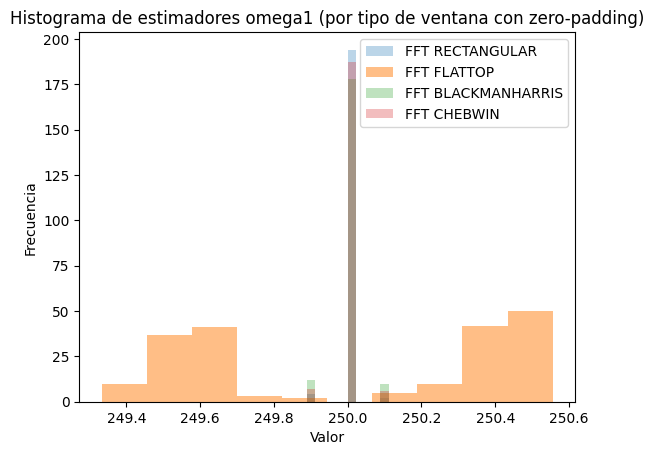

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
from scipy.fft import fft, fftshift

# Datos de la simulación
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000 # cantidad de muestras
Nfft = 9 * N  # nuevo tamaño de FFT para el 0 padding

ts = 1/fs  # tiempo de muestreo
df = fs / Nfft  # nueva resolución espectral para el 0 padding

R = 200 # Numero de pruebas
SNR = 10 #dB

# Generación de Señal
fr = np.random.uniform(-1/2, 1/2, size=(1, R))  # Vector flat de [1, R]
tt = np.linspace(0, (N-1)*ts, N).reshape((N, 1))  # Vector columna de [N, 1]
vtt = np.tile(tt, (1, R))  # Vector columna de [N, R]; repite R veces algo que es de [N;1]

f0 = fs / 4  # Mitad de franja digital
f1 = f0 + fr * df  # Frecuencia de las señales

a1 = np.sqrt(2)
xk = a1 * np.sin(2 * np.pi * f1 * vtt)  # Señal

# Generación del ruido
Pnk = 10**(-SNR / 10)  # Potencia del Ruido
sigma = np.sqrt(Pnk)
nk = np.random.normal(0, sigma, (N, R))

S = xk + nk

#%% FFT
# Aplicar FFT con zero padding
ft_S = np.fft.fft(S, n=Nfft, axis=0) / N  # FFT por columnas
ff = np.linspace(0, (Nfft-1) * df, Nfft)  # Grilla de sampleo frecuencial con zero padding

# Máscara para frecuencias positivas (hasta fs/2)
bfrec = ff <= fs / 2

# Gráfico del espectro
# plt.close('all')
# plt.figure(1)
# for i in range(R):
#     plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_S[bfrec, i]) ** 2))

# plt.xlabel('Frecuencia (Hz)')
# plt.ylabel('Densidad de Potencia (dB)')
# plt.title('Espectro de la señal')
# plt.grid(True)
# plt.show()

#%% FFT con ventanas
# Ventana Flattop
ventana = signal.windows.flattop(N).reshape((N, 1))
SFlattop = S * ventana

ft_SFlattop = np.fft.fft(SFlattop, n=Nfft, axis=0) / N  # FFT por columnas
# plt.figure(2)
# for i in range(R):
#     plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SFlattop[bfrec, i]) ** 2))

# plt.xlabel('Frecuencia (Hz)')
# plt.ylabel('Densidad de Potencia (dB)')
# plt.title('Espectro de la señal Flattop')
# plt.grid(True)
# plt.show()

# Ventana Blackmanharris
ventana = signal.windows.blackmanharris(N).reshape((N, 1))
SBlackmanharris = S * ventana

ft_SBlackmanharris = np.fft.fft(SBlackmanharris, n=Nfft, axis=0) / N  # FFT por columnas
# plt.figure(3)
# for i in range(R):
#     plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SBlackmanharris[bfrec, i]) ** 2))

# plt.xlabel('Frecuencia (Hz)')
# plt.ylabel('Densidad de Potencia (dB)')
# plt.title('Espectro de la señal Blackman Harris')
# plt.grid(True)
# plt.show()

# Ventana Chebwin
ventana3 = signal.windows.chebwin(N, 60).reshape((N, 1))  # 60 dB atenuación
SChebwin = S * ventana3

ft_SChebwin = np.fft.fft(SChebwin, n=Nfft, axis=0) / N  # FFT por columnas
# plt.figure(4)
# for i in range(R):
#     plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SChebwin[bfrec, i]) ** 2))

# plt.xlabel('Frecuencia (Hz)')
# plt.ylabel('Densidad de Potencia (dB)')
# plt.title('Espectro de la señal Chebwin')
# plt.grid(True)
# plt.show()

#%% Histograma de omega1
## Estimador omega1 para ventana rectangular
P_est1 = (1 / N) * np.abs(ft_S[bfrec, :]) ** 2  # Estimación del espectro
omega1_est_r = np.argmax(P_est1, axis=0) * df  # Índice del máximo por columna

sesgo_omega1_r = np.mean(omega1_est_r - f1)
varianza_omega1_r = np.var(omega1_est_r - f1)

## Estimador omega1 para ventana flattop
P_est2 = (1 / N) * np.abs(ft_SFlattop[bfrec, :]) ** 2
omega1_est_F = np.argmax(P_est2, axis=0) * df

sesgo_omega1_f = np.mean(omega1_est_F - f1)
varianza_omega1_f = np.var(omega1_est_F - f1)

## Estimador omega1 para ventana Blackmanharris
P_est3 = (1 / N) * np.abs(ft_SBlackmanharris[bfrec, :]) ** 2
omega1_est_B = np.argmax(P_est3, axis=0) * df

sesgo_omega1_b = np.mean(omega1_est_B - f1)
varianza_omega1_b = np.var(omega1_est_B - f1)

## Estimador omega1 para ventana Chebwin
P_est4 = (1 / N) * np.abs(ft_SChebwin[bfrec, :]) ** 2
omega1_est_c = np.argmax(P_est4, axis=0) * df

sesgo_omega1_c = np.mean(omega1_est_c - f1)
varianza_omega1_c = np.var(omega1_est_c - f1)

# Crear la figura para el histograma
plt.figure(12)

# Graficar el histograma de omega1 por tipo de ventana
plt.hist(omega1_est_r, bins=10, label='FFT RECTANGULAR', alpha=0.3)
plt.hist(omega1_est_F, bins=10, label='FFT FLATTOP', alpha=0.5)
plt.hist(omega1_est_B, bins=10, label='FFT BLACKMANHARRIS', alpha=0.3)
plt.hist(omega1_est_c, bins=10, label='FFT CHEBWIN', alpha=0.3)
plt.title('Histograma de estimadores omega1 (por tipo de ventana con zero-padding)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Al aplicar cero padding (en este caso, elegí multiplicar la cantidad de muestras, N, por un factor de 9, lo que da como resultado un mayor número de muestras en la transformada), observamos en el gráfico que los estimadores de omega para las distintas ventanas se vuelven más concentrados, presentándose en una columna más estrecha en comparación con el histograma generado anteriormente. Este comportamiento se debe a que el cero padding, al aumentar la cantidad de muestras, mejora la precisión con la que podemos ubicar el pico en la frecuencia, gracias a una mayor resolución espectral.

# Resultado

| Estimador | Ventana          | Sesgo (10 dB)      | Varianza (10 dB)   | Sesgo (3 dB)       | Varianza (3 dB)    |
|-----------|------------------|--------------------|---------------------|---------------------|---------------------|
| a₁        | Rectangular      | -7.920551e-01       | 5.914195e-03        | -7.946874e-01       | 6.737247e-03        |
| a₁        | Flattop          | -1.261764e+00       | 4.315545e-05        | -1.261640e+00       | 4.754382e-05        |
| a₁        | Blackman-Harris  | -1.167709e+00       | 1.007030e-04        | -1.168073e+00       | 1.368899e-04        |
| a₁        | Chebyshev        | -1.091696e+00       | 2.919605e-04        | -1.092498e+00       | 3.840451e-04        |
| ω₁        | Rectangular      | -3.997285e-02       | 9.632262e-02        | -3.497285e-02       | 7.966155e-02        |
| ω₁        | Flattop          | -4.972847e-03       | 1.109356e-01        | -1.497285e-02       | 1.930788e-01        |
| ω₁        | Blackman-Harris  | -2.997285e-02       | 8.003700e-02        | -3.497285e-02       | 8.089777e-02        |
| ω₁        | Chebyshev        | -2.997285e-02       | 1.144913e-01        | -2.497285e-02       | 8.062955e-02        |



## Comparación de Estimadores: a₁ y ω₁

En la tabla se presentan la comparación entre los estimadores **a₁**, asociado a la amplitud de la señal, y **ω₁**, relacionado con la frecuencia. El análisis se realiza en función del tipo de ventana utilizada y del nivel de relación señal/ruido (SNR), que en esta experiencia se evaluó en dos niveles: 10 dB y 3 dB. Sabemos que a mayor SNR, menor es la cantidad de ruido presente en la señal, lo que provoca menos varianza por dispersión.

Para cada estimador se midieron su:

- **Sesgo**: diferencia entre el valor estimado y el valor real. Idealmente debería ser cero.
- **Varianza**: indica cuánto varía la estimación entre mediciones. Cuanto menor es la varianza, más precisa es la estimación.


### Estimación de a₁

- La ventana **Rectangular a 10 dB** presenta el sesgo más bajo, lo que indica que el valor estimado se acerca más al valor real.
- La ventana **Flattop a 10 dB** es la de menor varianza, es decir que hay una mayor precisión entre mediciones.
- La **Blackman-Harris** tiene un sesgo apenas superior a la Flattop pero la varianza es un orden superior.
- La **Chebyshev** tiene un sesgo del mismo orden que la Blackman-Harris y que la Flattop, pero nuevamente, su varianza es de un orden superior a la Flattop pot lo que tiene menor presición en las mediciones.

En este caso, si se prioriza el **sesgo**, la mejor opción es la *Rectangular a 10 dB*, pero si se prioriza la **varianza**, la *Flattop a 10 dB* es la más adecuada. Como el sesgo puede ser corregido posteriormente mediante calibraciones o ajustes experimentales, y la varianza representa una incertidumbre más difícil de controlar, se prioriza minimizar la varianza. Por lo tanto, para la estimación del $a_1$, en mi criterio, la mejor ventana es la **Flattop a 10 dB**

### Estimación de ω₁

- La ventana **Flattop a 10 dB** tiene el sesgo más bajo, pero una varianza relativamente alta.
- La **Blackman-Harris a 10 dB** presenta una varianza baja pero su sesgo es un orden mayor a la Flattop.
- La **ventana Rectangular** y **Chebyshev** a **10 dB** tienen un sesgo similar a la Blackman-Harris a 10 dB, pero la varianza de la de Chebyshev es de un orden mayor. La ventana Rectangular, es la que presenta menor varianza pero comparte el mismo orden que la Blackman-Harris a 10 dB .

En este caso, para estimar **ω₁**, la mejor opción es la **Blackman-Harris o la Rectangular a 10 dB**.

Las condiciones de *10 dB* ofrecen mejores resultados que *3 dB*, tanto en términos de sesgo como de varianza, lo cual valida que a un mayor SNR se mejora la calidad de las estimaciones.


## Zero padding
El zero padding interpola la DFT, es decir, genera más puntos en el espectro sin añadir información nueva. Esto permite ubicar con mayor precisión la posición del pico en frecuencia, mejorando así la estimación de **ω₁**.

En cambio, no tiene sentido aplicarlo para mejorar la estimación de **a₁**, ya que la energía total de la señal no varía y la amplitud real no se ve afectada. De hecho, al redistribuirse la energía entre más puntos, el zero padding podría incluso empeorar la estimación de a₁ si no se ajusta adecuadamente.Por esta razón, no se incluye el gráfico del estimador de a₁, ya que no aporta información relevante en el contexto del zero padding.

# Conclusión
Esta tarea me resultó muy útil para entender de forma más concreta cómo funciona el ventaneo de señales y cómo cada ventana tiene una mejor aproximación que otra para distintos parámetros. Adquirí el concepto de sesgo y varianza, y entendí por qué, entre uno y otro, es más importante minimizar la varianza que el sesgo; es más sencillo corregir un sesgo mediante calibraciones o ajustes experimentales que reducir la varianza, la cual representa una incertidumbre más difícil de controlar. Esto lo pude poner en práctica mediante el análisis de la tabla comparativa de valores de los estimadores.

También comprendí cómo el cambio en los SNR afecta mis estimaciones: cuanto mayor es el SNR, menor es la varianza en el sistema, lo que resulta en estimaciones más precisas.

Por último, el bonus sobre el cero padding me aclaró el por qué se utiliza y cuál es la ventaja que tiene. Entendí que tiene sentido aplicarlo en el estimador de la frecuencia (ω₁) ya que mejora la resolución espectral, pero no es útil para el estimador de la amplitud (a₁), ya que no afecta la energía total de la señal y podría incluso empeorar la estimación si no se ajusta adecuadamente. Si bien durante todo el código consulté a la IA para poder ir armándolo junto a los docentes, esta parte fue la que me resultó más complicada, sobre todo por el cambio en la grilla de muestreo y los tipos de tamaños al aumentar mi cantidad de muestras.